In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q /content/drive/MyDrive/DATASETS/The_Entity_Dataset.zip -d /content/DATASET


In [4]:
# List the contents of the crack_detection folder
!ls /content/DATASET/dataset

data.yaml  train  valid


In [5]:
# Display the contents of the data.yaml file
!cat /content/DATASET/dataset/data.yaml

train: /content/DATASET/dataset/train/images
val: /content/DATASET/dataset/valid/images

nc: 4
names: ['gun' , 'smoke' , 'fire' ,  'violence']


In [6]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 9.9 MB/s eta 0:00:00


In [7]:
from ultralytics import YOLO
import os
from IPython.display import display,Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 509, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [8]:
from ultralytics import YOLO

# Create a new YOLO model from scratch
model = YOLO('yolov8n.yaml')

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')

# Train the model using the  dataset for 3 epochs
results = model.train(data='/content/DATASET/dataset/data.yaml', epochs=150)

# Evaluate the model's performance on the validation set
results = model.val()

# # Perform object detection on an image using the model
# results = model('https://ultralytics.com/images/bus.jpg')

# # Export the model to ONNX format
# success = model.export(format='onnx')

100%|██████████| 6.23M/6.23M [00:00<00:00, 90.2MB/s]


Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/DATASET/dataset/data.yaml, epochs=150, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 19.0MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/DATASET/dataset/train/labels... 538 images, 8 backgrounds, 0 corrupt: 100%|██████████| 546/546 [00:00<00:00, 1912.42it/s]


train: New cache created: /content/DATASET/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/DATASET/dataset/valid/labels... 256 images, 2 backgrounds, 0 corrupt: 100%|██████████| 258/258 [00:00<00:00, 1050.51it/s]

val: New cache created: /content/DATASET/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.46G      1.833      3.631      1.991          3        640: 100%|██████████| 35/35 [00:16<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        258        304     0.0114      0.456     0.0551     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.32G       1.71      2.978      1.898          3        640: 100%|██████████| 35/35 [00:11<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]


                   all        258        304      0.612      0.107     0.0805     0.0226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.31G      1.807      2.926      1.962          2        640: 100%|██████████| 35/35 [00:11<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.09it/s]


                   all        258        304     0.0636     0.0693     0.0396     0.0116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.32G      1.768      2.757      1.913          4        640: 100%|██████████| 35/35 [00:11<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]


                   all        258        304      0.427      0.212       0.14     0.0476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.34G       1.88      2.682      1.988          9        640: 100%|██████████| 35/35 [00:10<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]


                   all        258        304      0.411       0.11     0.0588     0.0153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.32G      1.849      2.577      2.015          6        640: 100%|██████████| 35/35 [00:09<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]


                   all        258        304      0.106      0.252     0.0912     0.0268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.31G      1.834      2.452      1.958          6        640: 100%|██████████| 35/35 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        258        304      0.466      0.192      0.151     0.0455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.32G      1.765      2.294      1.855          4        640: 100%|██████████| 35/35 [00:09<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]

                   all        258        304      0.115      0.207      0.109     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.32G      1.814      2.257       1.94          2        640: 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        258        304      0.359      0.195      0.127     0.0475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.32G      1.762      2.187      1.887          2        640: 100%|██████████| 35/35 [00:11<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        258        304      0.544       0.18      0.179     0.0584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.31G      1.759      2.075      1.868          5        640: 100%|██████████| 35/35 [00:11<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]

                   all        258        304      0.217      0.196      0.143     0.0435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.32G      1.755       2.13      1.852          6        640: 100%|██████████| 35/35 [00:11<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.28it/s]


                   all        258        304      0.175       0.19      0.128     0.0442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.32G      1.692      1.907      1.794          6        640: 100%|██████████| 35/35 [00:11<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]

                   all        258        304      0.247      0.243      0.168     0.0541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.32G      1.697      1.923      1.773          5        640: 100%|██████████| 35/35 [00:11<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.31it/s]

                   all        258        304      0.218      0.257      0.218     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.31G      1.649      1.887      1.743          4        640: 100%|██████████| 35/35 [00:11<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]


                   all        258        304      0.229      0.221      0.122     0.0464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.32G      1.628      1.806      1.759          3        640: 100%|██████████| 35/35 [00:12<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]

                   all        258        304      0.316      0.167       0.13     0.0479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.32G      1.621      1.733      1.765          2        640: 100%|██████████| 35/35 [00:10<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        258        304      0.276      0.228      0.204     0.0751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.32G       1.65      1.815      1.761          2        640: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]


                   all        258        304      0.245      0.228      0.196     0.0746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.31G      1.619       1.72      1.736          9        640: 100%|██████████| 35/35 [00:09<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.10it/s]


                   all        258        304      0.274      0.206      0.208     0.0766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.32G      1.574      1.705      1.724          4        640: 100%|██████████| 35/35 [00:10<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.36it/s]

                   all        258        304      0.322      0.233      0.231     0.0802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.32G      1.561      1.622      1.724          3        640: 100%|██████████| 35/35 [00:10<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        258        304      0.201       0.23      0.158     0.0558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.32G      1.601      1.605      1.716          5        640: 100%|██████████| 35/35 [00:11<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.04it/s]

                   all        258        304      0.329      0.259       0.24     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.31G      1.574      1.528      1.708          4        640: 100%|██████████| 35/35 [00:11<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.34it/s]

                   all        258        304      0.326      0.186      0.186      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.32G       1.63      1.664      1.718          6        640: 100%|██████████| 35/35 [00:11<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]

                   all        258        304      0.238      0.305      0.195     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.32G      1.521      1.564       1.66          7        640: 100%|██████████| 35/35 [00:11<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]

                   all        258        304      0.234      0.266      0.208     0.0748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.32G       1.49      1.445      1.631          4        640: 100%|██████████| 35/35 [00:13<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.55it/s]

                   all        258        304       0.56      0.208      0.204     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.32G      1.555      1.501      1.668          5        640: 100%|██████████| 35/35 [00:11<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]

                   all        258        304      0.309      0.168      0.199      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.32G      1.522      1.475      1.644          7        640: 100%|██████████| 35/35 [00:11<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]

                   all        258        304      0.326      0.266      0.279      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.32G      1.549      1.483      1.642          6        640: 100%|██████████| 35/35 [00:11<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        258        304      0.389      0.327      0.275     0.0974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.32G      1.513      1.473      1.637          9        640: 100%|██████████| 35/35 [00:11<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.40it/s]

                   all        258        304      0.254      0.219      0.211     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.31G      1.511      1.454      1.614          2        640: 100%|██████████| 35/35 [00:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.05it/s]

                   all        258        304      0.268      0.256      0.216     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.32G      1.431      1.395      1.571          4        640: 100%|██████████| 35/35 [00:10<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.08it/s]

                   all        258        304      0.184      0.215      0.156      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.32G      1.514      1.443      1.657         10        640: 100%|██████████| 35/35 [00:09<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]


                   all        258        304      0.287      0.329      0.268      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.32G      1.441      1.361      1.573          5        640: 100%|██████████| 35/35 [00:10<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.16it/s]

                   all        258        304      0.315      0.226      0.222     0.0795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.33G       1.46      1.344       1.59          5        640: 100%|██████████| 35/35 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        258        304      0.342      0.357      0.236     0.0908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.32G       1.43      1.287      1.588          1        640: 100%|██████████| 35/35 [00:11<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.35it/s]

                   all        258        304      0.292      0.244      0.232     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.32G      1.438       1.33      1.588          2        640: 100%|██████████| 35/35 [00:11<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]

                   all        258        304      0.267      0.316      0.256     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.32G      1.425       1.31      1.563          7        640: 100%|██████████| 35/35 [00:11<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.29it/s]

                   all        258        304      0.435      0.234      0.251     0.0992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.31G      1.378      1.265      1.548          4        640: 100%|██████████| 35/35 [00:11<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.64it/s]

                   all        258        304      0.326      0.229      0.224     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.32G      1.374      1.223      1.546          9        640: 100%|██████████| 35/35 [00:11<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]

                   all        258        304      0.352      0.259      0.274      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.32G       1.35      1.218      1.505          2        640: 100%|██████████| 35/35 [00:11<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]

                   all        258        304      0.323      0.255      0.257     0.0955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.32G      1.373      1.183      1.514          3        640: 100%|██████████| 35/35 [00:11<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]

                   all        258        304       0.36      0.228      0.229     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.31G      1.428      1.278      1.553          2        640: 100%|██████████| 35/35 [00:11<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.58it/s]

                   all        258        304      0.278      0.287      0.248     0.0885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.32G      1.408      1.243      1.554          5        640: 100%|██████████| 35/35 [00:12<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]

                   all        258        304      0.597      0.266      0.273     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.32G      1.405      1.279      1.553          3        640: 100%|██████████| 35/35 [00:11<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]

                   all        258        304       0.31      0.257      0.257      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.32G      1.339      1.222      1.504          4        640: 100%|██████████| 35/35 [00:11<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        258        304      0.332       0.22       0.21     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.31G      1.328      1.141      1.491          4        640: 100%|██████████| 35/35 [00:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]

                   all        258        304      0.324      0.231      0.238     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.32G      1.395       1.15      1.548          4        640: 100%|██████████| 35/35 [00:11<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]

                   all        258        304      0.377      0.228      0.233     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.32G      1.363       1.14      1.488          6        640: 100%|██████████| 35/35 [00:11<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]

                   all        258        304      0.279      0.238      0.225     0.0805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.32G      1.294      1.121      1.487          2        640: 100%|██████████| 35/35 [00:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]

                   all        258        304      0.358      0.286      0.264     0.0955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.31G      1.314      1.183      1.483          2        640: 100%|██████████| 35/35 [00:10<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        258        304       0.29      0.331      0.265      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.32G      1.348      1.151       1.51          7        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        258        304      0.353      0.259      0.256     0.0986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.32G       1.26        1.1      1.472          2        640: 100%|██████████| 35/35 [00:11<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]

                   all        258        304      0.468       0.31      0.301      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.32G        1.3      1.111      1.471          3        640: 100%|██████████| 35/35 [00:10<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        258        304      0.374      0.203      0.202     0.0739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.31G      1.306      1.094      1.463          5        640: 100%|██████████| 35/35 [00:10<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.08it/s]

                   all        258        304      0.467      0.238       0.25     0.0913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.32G      1.314       1.27      1.476          1        640: 100%|██████████| 35/35 [00:11<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.27it/s]

                   all        258        304      0.299      0.344      0.263     0.0986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.32G      1.267      1.077      1.456          3        640: 100%|██████████| 35/35 [00:11<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]

                   all        258        304      0.343      0.207      0.199     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.32G      1.274      1.064      1.464          6        640: 100%|██████████| 35/35 [00:11<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.40it/s]

                   all        258        304      0.321      0.316      0.257      0.088



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.31G      1.276      1.053      1.456          4        640: 100%|██████████| 35/35 [00:11<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        258        304       0.38      0.274      0.254      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.32G      1.308      1.075      1.459          7        640: 100%|██████████| 35/35 [00:11<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.61it/s]

                   all        258        304       0.36       0.27      0.271     0.0978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.32G       1.28       1.06      1.461          5        640: 100%|██████████| 35/35 [00:11<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.62it/s]

                   all        258        304      0.294      0.327      0.254     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.32G      1.305      1.064      1.464          5        640: 100%|██████████| 35/35 [00:12<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        258        304      0.335      0.325      0.295      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.31G      1.226      0.998      1.424          3        640: 100%|██████████| 35/35 [00:11<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]

                   all        258        304      0.342      0.266       0.26        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.32G      1.226     0.9848       1.41          4        640: 100%|██████████| 35/35 [00:11<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]

                   all        258        304      0.523      0.249      0.293      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.32G      1.262      1.045      1.431          4        640: 100%|██████████| 35/35 [00:11<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]


                   all        258        304      0.367      0.238       0.25      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.32G      1.227      1.002      1.415          6        640: 100%|██████████| 35/35 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]


                   all        258        304      0.317      0.333      0.252     0.0878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.31G      1.208     0.9785      1.409          3        640: 100%|██████████| 35/35 [00:09<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]


                   all        258        304       0.38      0.278       0.27        0.1

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.32G      1.182     0.9377      1.379          5        640: 100%|██████████| 35/35 [00:09<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]

                   all        258        304       0.41       0.21       0.24     0.0878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.32G      1.181     0.9696      1.374          4        640: 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        258        304      0.444      0.263      0.268     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.32G      1.194     0.9334        1.4          7        640: 100%|██████████| 35/35 [00:10<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]

                   all        258        304      0.316      0.346      0.252     0.0967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.31G      1.177     0.9356      1.399          5        640: 100%|██████████| 35/35 [00:11<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.15it/s]

                   all        258        304      0.287      0.263      0.255      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.32G      1.159      0.895      1.368          5        640: 100%|██████████| 35/35 [00:11<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]

                   all        258        304      0.403      0.238      0.254     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.34G      1.186     0.9661      1.391          3        640: 100%|██████████| 35/35 [00:11<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.32it/s]

                   all        258        304      0.668      0.243      0.272      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.32G      1.169     0.9515       1.37          5        640: 100%|██████████| 35/35 [00:11<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]

                   all        258        304      0.332      0.274      0.255     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.31G      1.176     0.9416      1.374          5        640: 100%|██████████| 35/35 [00:11<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.52it/s]

                   all        258        304      0.421      0.249      0.285      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.34G      1.146     0.9224      1.391          2        640: 100%|██████████| 35/35 [00:11<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258        304      0.309      0.291      0.257      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.32G      1.157     0.9831      1.359          5        640: 100%|██████████| 35/35 [00:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.36it/s]

                   all        258        304      0.281      0.283      0.256      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.32G      1.107      0.868       1.34          1        640: 100%|██████████| 35/35 [00:11<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]

                   all        258        304      0.405      0.236      0.236     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.31G      1.145     0.8936      1.355          8        640: 100%|██████████| 35/35 [00:11<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.32it/s]

                   all        258        304      0.405      0.236      0.253     0.0968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.32G      1.117     0.8847       1.33          4        640: 100%|██████████| 35/35 [00:11<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        258        304      0.312      0.305      0.255      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.32G      1.119     0.8597      1.344          4        640: 100%|██████████| 35/35 [00:11<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        258        304      0.316      0.266      0.253     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.32G      1.165     0.9182      1.371          3        640: 100%|██████████| 35/35 [00:11<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.56it/s]

                   all        258        304      0.298      0.299      0.241     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.31G      1.109     0.8731      1.336          5        640: 100%|██████████| 35/35 [00:11<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.27it/s]


                   all        258        304      0.279        0.3      0.241     0.0932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.32G      1.103     0.8577      1.329          2        640: 100%|██████████| 35/35 [00:11<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        258        304      0.301      0.264      0.228     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.32G      1.148     0.9257      1.371          2        640: 100%|██████████| 35/35 [00:10<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all        258        304      0.406      0.228      0.227     0.0834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.32G      1.105     0.8664      1.325          3        640: 100%|██████████| 35/35 [00:09<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]

                   all        258        304      0.344       0.21      0.215     0.0872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.31G      1.108     0.8458      1.329          2        640: 100%|██████████| 35/35 [00:09<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]

                   all        258        304      0.334      0.228      0.235     0.0904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.33G      1.128      0.868      1.342          5        640: 100%|██████████| 35/35 [00:10<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        258        304      0.369      0.221      0.217       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.32G      1.098     0.8538      1.328          2        640: 100%|██████████| 35/35 [00:10<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        258        304      0.306      0.271      0.243     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.32G      1.124     0.8551      1.317          6        640: 100%|██████████| 35/35 [00:12<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258        304       0.41      0.268       0.27     0.0969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.31G      1.069     0.8028      1.305          6        640: 100%|██████████| 35/35 [00:11<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.61it/s]

                   all        258        304      0.367       0.26       0.24     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.34G      1.096     0.8433      1.307          3        640: 100%|██████████| 35/35 [00:11<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.59it/s]

                   all        258        304      0.352      0.279      0.276     0.0942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.32G      1.031     0.7636      1.263          6        640: 100%|██████████| 35/35 [00:11<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]

                   all        258        304      0.311      0.236      0.229     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.32G       1.07     0.7987      1.295          2        640: 100%|██████████| 35/35 [00:11<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]

                   all        258        304      0.421      0.266      0.268     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.31G      1.062     0.8088      1.305          6        640: 100%|██████████| 35/35 [00:11<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.37it/s]

                   all        258        304        0.4      0.282       0.28      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.32G      1.071     0.8329        1.3          2        640: 100%|██████████| 35/35 [00:11<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]

                   all        258        304      0.367      0.241      0.253     0.0921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.32G      1.078     0.7784      1.294          2        640: 100%|██████████| 35/35 [00:11<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.28it/s]

                   all        258        304      0.308      0.321      0.253     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.32G     0.9808     0.7608      1.259          7        640: 100%|██████████| 35/35 [00:11<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]

                   all        258        304      0.455      0.215      0.259     0.0976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.31G      1.015       0.75      1.279          2        640: 100%|██████████| 35/35 [00:12<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.45it/s]

                   all        258        304      0.396      0.246      0.244     0.0928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.32G      1.059     0.8429      1.297          4        640: 100%|██████████| 35/35 [00:11<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        258        304      0.385      0.247      0.246      0.094



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.32G      1.041     0.7795      1.292          3        640: 100%|██████████| 35/35 [00:11<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.38it/s]

                   all        258        304      0.433      0.223      0.248     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.33G       1.01     0.7299      1.262          5        640: 100%|██████████| 35/35 [00:11<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.76it/s]

                   all        258        304      0.397      0.241      0.256     0.0979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.31G       1.01     0.8013      1.266          2        640: 100%|██████████| 35/35 [00:10<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]


                   all        258        304      0.338      0.265       0.26      0.107
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 53, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

103 epochs completed in 0.432 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.87it/s]


                   all        258        304      0.465      0.312      0.302      0.118
                   gun        258        117       0.68      0.265      0.303     0.0895
                 smoke        258         13     0.0834     0.0769      0.012    0.00512
                  fire        258         68      0.601      0.368      0.375      0.127
              violence        258        106      0.495      0.538      0.517      0.251
Speed: 0.4ms preprocess, 3.4ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/DATASET/dataset/valid/labels.cache... 256 images, 2 backgrounds, 0 corrupt: 100%|██████████| 258/258 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.81it/s]


                   all        258        304      0.459      0.309        0.3      0.118
                   gun        258        117      0.677      0.265      0.303     0.0891
                 smoke        258         13     0.0819     0.0769      0.012    0.00512
                  fire        258         68      0.587      0.368      0.373      0.128
              violence        258        106       0.49      0.525      0.513      0.251
Speed: 0.5ms preprocess, 8.7ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train2


In [9]:
# Evaluate the model's performance on the validation set
results = model.val()

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/DATASET/dataset/valid/labels.cache... 256 images, 2 backgrounds, 0 corrupt: 100%|██████████| 258/258 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.67it/s]


                   all        258        304      0.459      0.309        0.3      0.118
                   gun        258        117      0.677      0.265      0.303     0.0891
                 smoke        258         13     0.0819     0.0769      0.012    0.00512
                  fire        258         68      0.587      0.368      0.373      0.128
              violence        258        106       0.49      0.525      0.513      0.251
Speed: 0.6ms preprocess, 6.2ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train3


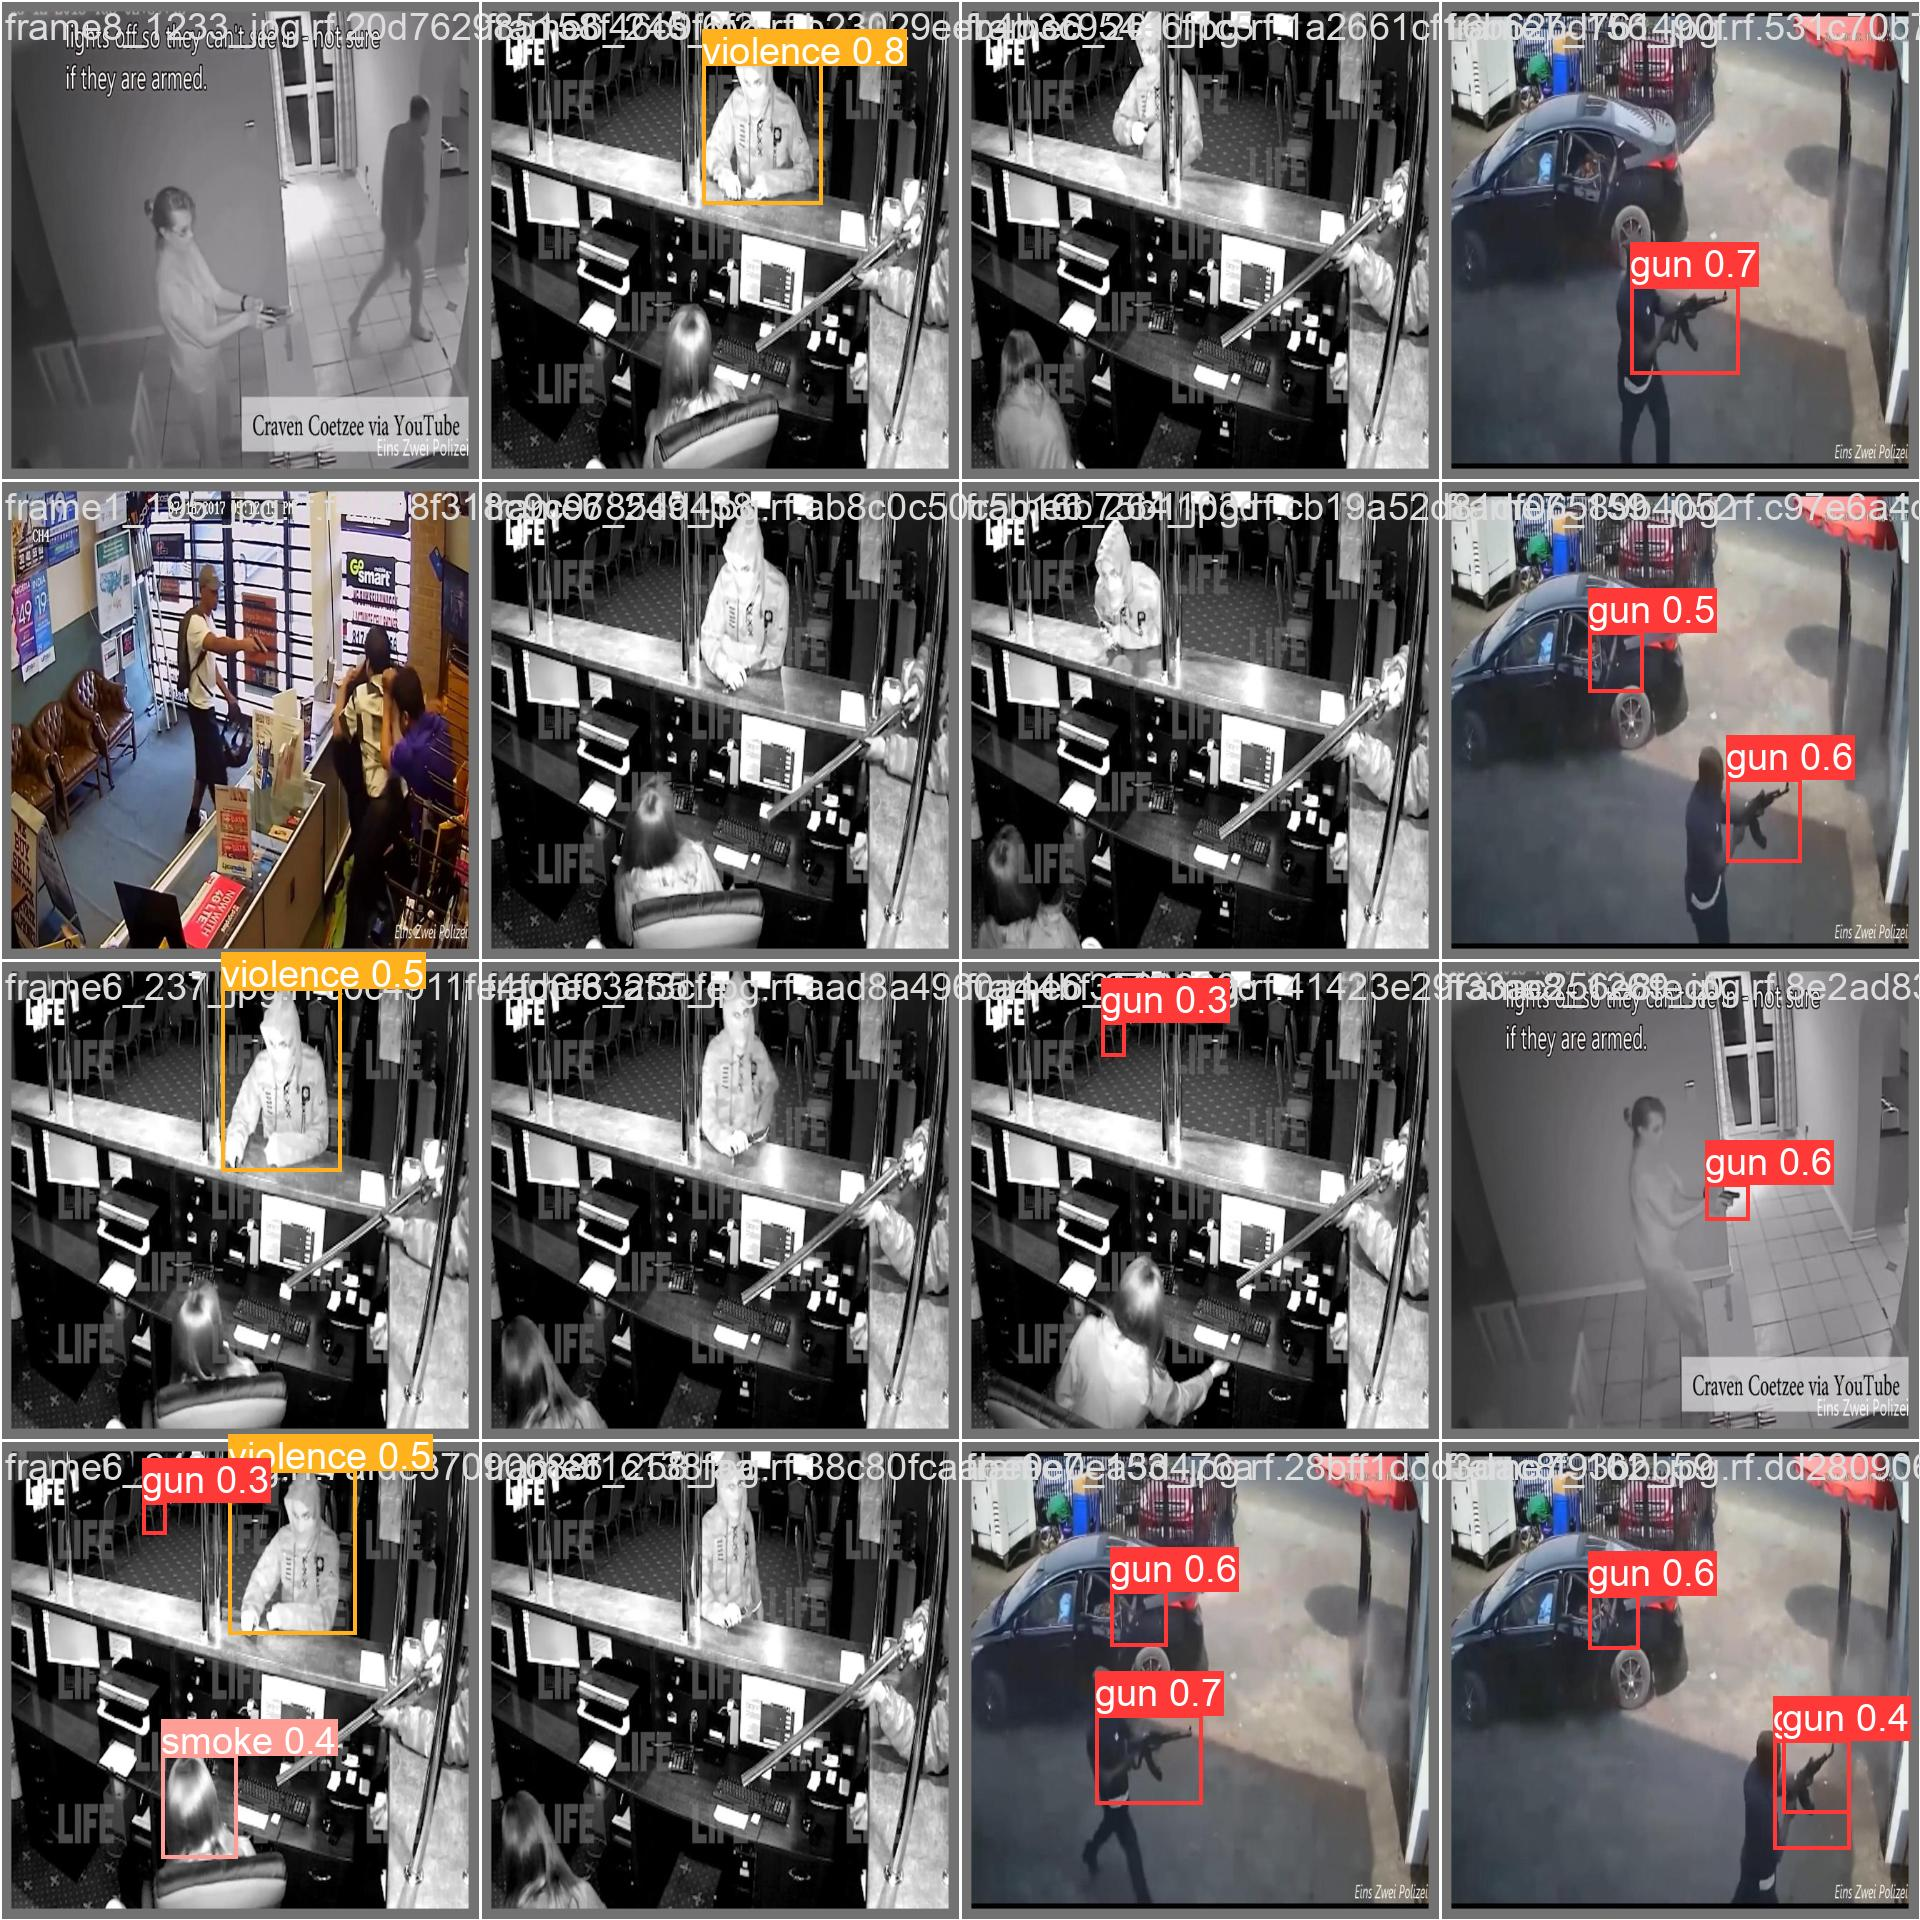

In [11]:
Image(filename="/content/runs/detect/train3/val_batch2_pred.jpg", width=800)

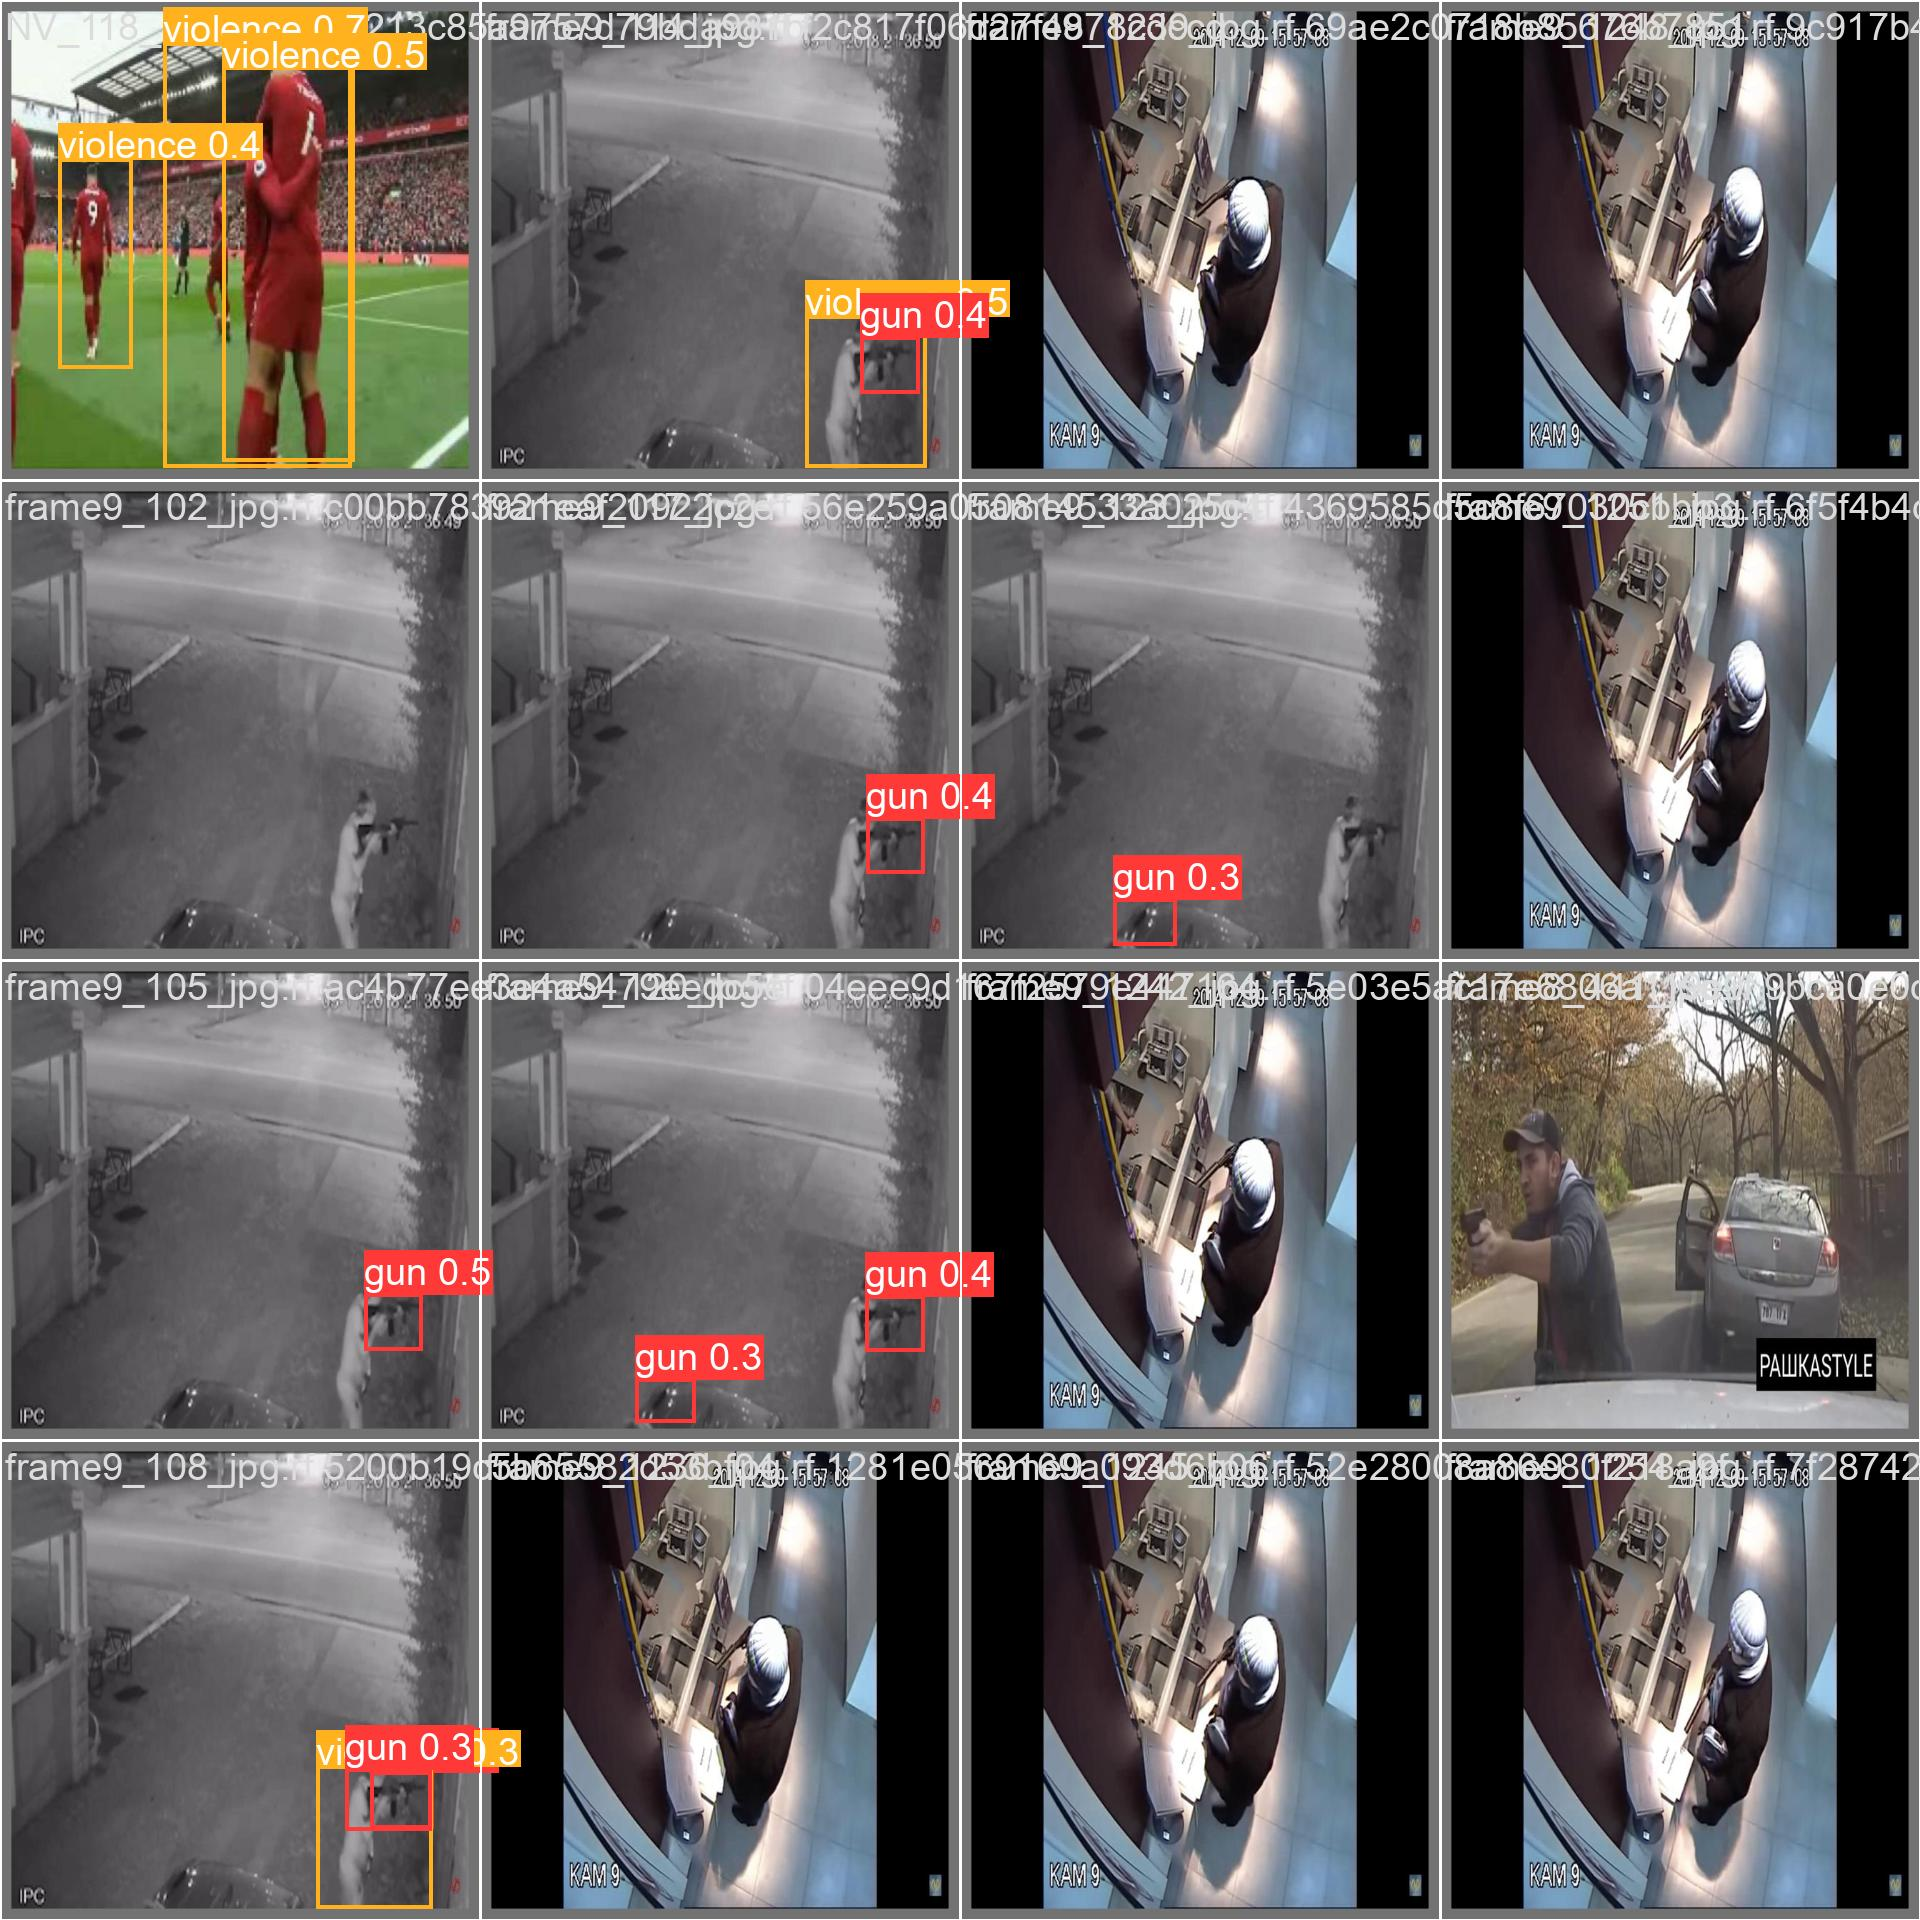

In [12]:
Image(filename="/content/runs/detect/train2/val_batch0_pred.jpg", width=800)